# Hypothesis 3:

The amount of crimes will increase as the proportion of high-income residents increases and the proportion of low-income residents decreases

In [1]:
import pandas as pd
import seaborn as sns
import function_with_doctest as fn

In [2]:
# data preprocessing
boston_bldg = fn.preprocessing_hypothesis_3()

/Users/Quentin/Code/IS597/2022Spring_Finals/function_with_doctest.py:175: DtypeWarning: Columns (1,40,44,47,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  boston_bldg_all = pd.read_csv('data/boston_building_inventory.csv')
/Users/Quentin/Code/IS597/2022Spring_Finals/function_with_doctest.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boston_bldg['st_name'] = df_boston_bldg['st_name'].str.strip()
/Users/Quentin/Code/IS597/2022Spring_Finals/function_with_doctest.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [3]:
# group by low_income
boston_bldg_by_low_income = fn.boston_building_category_group_by_street(boston_bldg, 'ct_perc_low_to_no_income', 'boston_bldg_by_low_income.csv')

In [4]:
# group by high_income
boston_bldg_by_high_income = fn.boston_building_category_group_by_street(boston_bldg, 'ct_perc_income_200000_or_more', 'boston_bldg_by_high_income.csv')

In [5]:
crime_by_street = fn.get_crime_group_by_street()

/Users/Quentin/Code/IS597/2022Spring_Finals/function_with_doctest.py:218: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('data/boston_crime.csv')


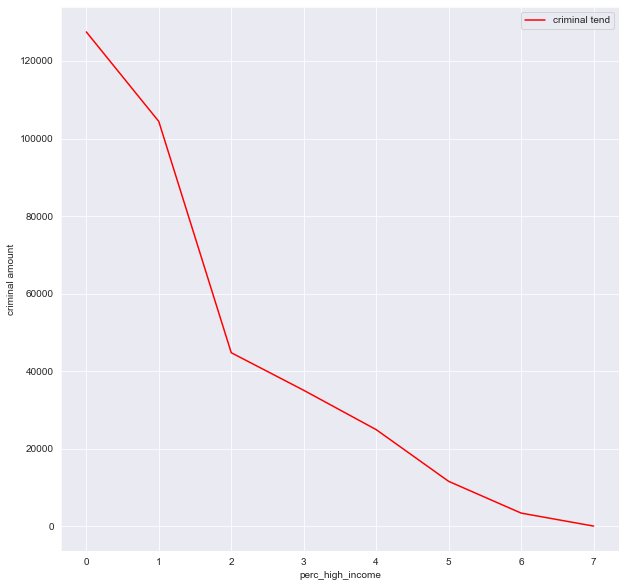

In [7]:
# line chart for high income
fn.plot_line_chart_for_street_avg_group(boston_bldg_by_high_income, crime_by_street, 'perc_high_income')

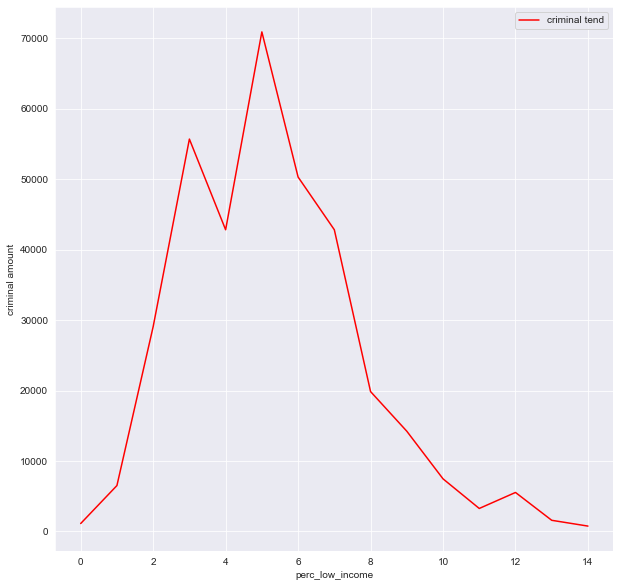

In [8]:
# line chart for low income
fn.plot_line_chart_for_street_avg_group(boston_bldg_by_low_income, crime_by_street, 'perc_low_income')

According to the results, we can see that as the proportion of high-income people in the region increases, the number of crimes also gradually decreases; but when the proportion of low-income people in the region increases, the number of crimes first increases and then decreases, at reach the peak in the range of 15% to 30%.

In [10]:
high_income = fn.street_avg_group(boston_bldg_by_high_income, crime_by_street, 'perc_high_income')
high_income

,group,crime_count
0,0,127484
1,1,104408
2,2,44783
3,3,35098
4,4,24957
5,5,11625
6,6,3441
7,7,90


In [11]:
low_income = fn.street_avg_group(boston_bldg_by_low_income, crime_by_street, 'perc_low_income')
low_income

,group,crime_count
0,0,1129
1,1,6518
2,2,29068
3,3,55693
4,4,42823
5,5,70904
6,6,50308
7,7,42825
8,8,19857
9,9,14231


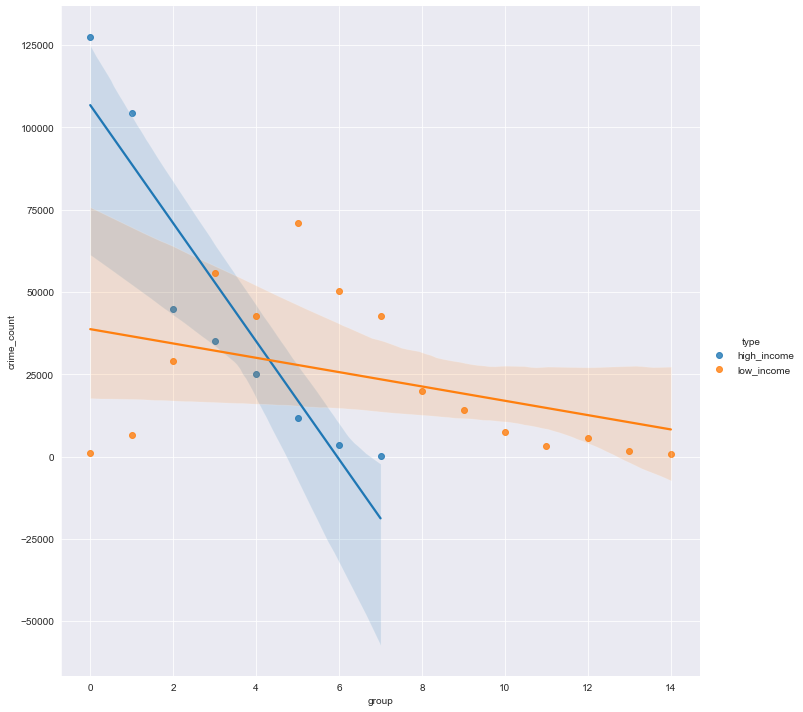

In [12]:
high_income['type'] = 'high_income'
low_income['type'] = 'low_income'
income_regression = pd.concat([high_income, low_income])
income_regression = income_regression.iloc[:,[0, 1,2,]]
g = sns.lmplot(x="group", y="crime_count", hue="type", data=income_regression, height=10)

Through regression analysis, we can also see that the proportion of high-income groups has a significant impact on the number of crimes.

## Conclusion

Hypothesis 3 is rejected. The proportion of high-income people has a significant negative correlation with the number of crimes, while the proportion of low-income people has no significant effect on the number of crimes.